# <b>1 <span style='color:#2ae4f5'>|</span> Importando Bibliotecas </b>

In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import os

import matplotlib.pyplot as plt
#load mnist dataset

/Users/humbertotavora/Documents/UFPE/Deep Learning/Projeto de Pesquisa/DeepLearningProject/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# <b>2 <span style='color:#2ae4f5'>|</span> Dataset </b>

### MNIST Dataset

In [10]:
# Setup train and test splits
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape)  # (60000,)
print("First 5 training labels: ", y_train[:5])  # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Splitting dataset for faster learning and debugging
X_train, _, _, _, _, _ = np.split(X_train, 6)
y_train, _, _, _, _, _ = np.split(y_train, 6)

# Reshape the data for CNN (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(y_train.shape)
print(X_train.shape)

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
(10000, 10)
(10000, 28, 28, 1)


In [20]:
nShapeSize = 28
nShape = 1

### Chest X-Ray Images (Pneumonia)

In [3]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_classes = 2

train = keras.utils.image_dataset_from_directory(
    directory='chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras.utils.image_dataset_from_directory(
    directory='chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

print(train.class_names)
print(test.class_names)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


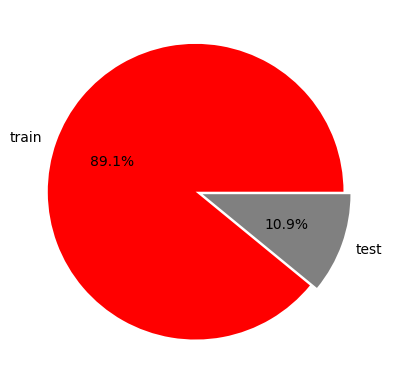

In [4]:
plt.pie([len(train), len(test)],
        labels=['train','test'], autopct='%.1f%%', colors=['red', 'grey'], explode=(0.05, 0))
plt.show()

In [5]:
# Extracting Features and Labels
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_test = np.concatenate(y_test, axis=0)

# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
X_train=x_train/256
X_test=x_test/256

2024-11-08 23:48:59.553195: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-08 23:49:00.214328: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape of 'x_train': (5216, 256, 256, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [ ]:
nShapeSize = 256
nShape = 3

# <b>3 <span style='color:#2ae4f5'>|</span> Hiperparametros </b>

Hiperparamtros considerados na evolução:

* DNA[0] = depth
* DNA[1] = filters per layer
* DNA[2] = activations
* DNA[3] = optimizer
* DNA[4] = losses

In [11]:
DNA_parameter = [
    [1, 2, 3, 4, 5],  # depth
    [32, 64, 128],  # filters per layer
    ["relu", "tanh", "sigmoid"],  # activations
    ["sgd", "adam"],  # optimizers
    ["categorical_crossentropy", "binary_crossentropy", "poisson"]  # loss functions
]

# <b>4 <span style='color:#2ae4f5'>|</span> CNN </b>

In [12]:
class Network:
    def __init__(self, input_shape, classes, DNA_param, epochs):
        self.architecture_DNA = []
        self.fitness = []
        self.acc_history = []
        self.input_shape = input_shape
        self.classes = classes
        self.epochs = epochs

        depth = DNA_param[0]
        self.architecture_DNA.append(depth)       

        model = Sequential()
        # Building the init network with random choices
        network_depth = depth
        for i in range(network_depth):
            filters = DNA_param[i+1][0]
            activation = DNA_param[i+1][1]
            
            self.architecture_DNA.append([filters,activation])

            if i == 0:
                model.add(Conv2D(filters, kernel_size=(3, 3), activation=activation, input_shape=self.input_shape))
            else:
                model.add(Conv2D(filters, kernel_size=(3, 3), activation=activation))

            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(self.classes, activation='softmax'))
        optimizer = DNA_param[-2]
        loss = DNA_param[-1]
        self.architecture_DNA.append(optimizer)
        self.architecture_DNA.append(loss)

        model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
        print("Individuo criado: ", self.give_DNA())
        self.model = model
    
    @classmethod
    def from_random_DNA(cls, input_shape, classes, epochs):
        # Parâmetros globais de DNA
        depth_options = DNA_parameter[0]
        filters_per_layer = DNA_parameter[1]
        activations = DNA_parameter[2]
        optimizers = DNA_parameter[3]
        losses = DNA_parameter[4]
        DNA_param = []
        
        # Escolhas aleatórias para cada parte do DNA
        network_depth = np.random.choice(depth_options)
        DNA_param.append(network_depth)
        
        for i in range(network_depth):
            filters = np.random.choice(filters_per_layer)
            activation = np.random.choice(activations)
            DNA_param.append([filters, activation])
        
        # Escolher otimizador e perda aleatoriamente
        optimizer = np.random.choice(optimizers)
        loss = np.random.choice(losses)
        DNA_param.append(optimizer)
        DNA_param.append(loss)

        # Retornar nova instância da classe com o DNA aleatório
        return cls(input_shape, classes, DNA_param, epochs)



    def create_children(self, children_DNA):
        model = Sequential()

        children_depth = children_DNA[0]
        for i in range(children_depth):
            filters = children_DNA[i + 1][0]
            activation = children_DNA[i + 1][1]

            if i == 0:
                model.add(Conv2D(filters, kernel_size=(3, 3), activation=activation, input_shape=self.input_shape))
            else:
                model.add(Conv2D(filters, kernel_size=(3, 3), activation=activation))

            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(self.classes, activation='softmax'))
        model.compile(optimizer=children_DNA[-2], loss=children_DNA[-1],  metrics=['accuracy'])
        self.model = model
        self.architecture_DNA = children_DNA

    def train(self):
        with tf.device('/GPU:0'):  # Garante que a GPU será utilizada
            self.model.fit(X_train, y_train, batch_size=32, epochs=self.epochs, verbose=1, shuffle=True)

    def test(self):
        with tf.device('/GPU:0'):
            loss, acc = self.model.evaluate(X_test, y_test)
        self.fitness = acc
        self.acc_history.append(acc)

    def give_DNA(self):
        return self.architecture_DNA

    def architecture(self):
        self.model.summary()


# <b>5 <span style='color:#2ae4f5'>|</span> Algoritmo Genético </b>

In [21]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, generations=50, epochs=2):
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.training_epochs = epochs
        self.population = None
        self.population_size = population_size
        self.children_population_DNA = []
        self.fitnessList = []
        self.best_model = None
        self.best_DNA = None
        self.best_fitness = -1  # Fitness inicial negativo para garantir atualização


    def create_population(self):
        self.population = [Network.from_random_DNA((nShapeSize, nShapeSize, nShape), num_classes, self.training_epochs) for _ in range(self.population_size)]

    def train_generation(self):
        i = 1
        for member in self.population:
            print("Genoma ", str(i) + " treinamento:")
            member.train()
            i = i + 1

    def predict(self):
        i = 1
        for member in self.population:
            print("Genoma ", str(i) + " teste para calculo de fitenss:")
            member.test()
            self.fitnessList.append(member.fitness)
            i = i + 1

    def clear_losses(self):
        self.fitnessList = []

    def select_parents(self):
        fitness_scores = np.array([member.fitness for member in self.population])
        probabilities = fitness_scores / fitness_scores.sum()
        parents_indices = np.random.choice(range(self.population_size), size=2, p=probabilities)
        return [self.population[parents_indices[0]], self.population[parents_indices[1]]]
    
    def select_survivors(self, n_survivors):
        fitness_scores = np.array([member.fitness for member in self.population])
        probabilities = fitness_scores / fitness_scores.sum()
        parents_indices = np.random.choice(range(self.population_size+2), size=n_survivors, p=probabilities)

        survivors = []
        for idx in parents_indices:
            survivors.append(self.population[idx])

        self.population = survivors.copy()

    def crossover(self, parent1, parent2):
        dna1 = parent1.give_DNA()
        dna2 = parent2.give_DNA()
        child_DNA = []

        # Seleciona profundidade (depth) do DNA dos pais
        child_DNA.append(dna1[0])

        for i in range(dna1[0]):
            filters = dna1[i+1][0]
            activation = dna1[i+1][1]
            child_DNA.append([filters, activation])

        # Seleciona otimizador, e função de perda

        optimizer = dna2[-2]
        loss = dna2[-1]
        child_DNA.append(optimizer)
        child_DNA.append(loss)
        
        return child_DNA
    
    def give_DNA(self):
        print("DNA:", self.architecture_DNA)  # Adicione este print para depuração
        return self.architecture_DNA
    
    def mutate(self, dna):
        copyDNA = dna.copy()
        mutated_DNA = []
        # Mutação para profundidade, filtros e função de ativação, garantindo uma lista de mesmo comprimento que profundidade
        if np.random.rand() < self.mutation_rate:
            mutated_DNA.append(np.random.choice(DNA_parameter[0]))
            for i in range(mutated_DNA[0]):
                filters = np.random.choice(DNA_parameter[1])
                activation = np.random.choice(DNA_parameter[2])
                mutated_DNA.append([filters, activation])
        else:
            mutated_DNA.append(copyDNA[0])
            for i in range(copyDNA[0]):
                filters = copyDNA[i + 1][0]
                activation = copyDNA[i + 1][1]
                mutated_DNA.append([filters, activation])

        # Alteração de optimizer
        if np.random.rand() < self.mutation_rate:
            mutated_DNA.append(np.random.choice(DNA_parameter[3]))
        else:
            mutated_DNA.append(copyDNA[-2])

        # Alteração de loss
        if np.random.rand() < self.mutation_rate:
            mutated_DNA.append(np.random.choice(DNA_parameter[4]))
        else:
            mutated_DNA.append(copyDNA[-1])

        
        print("Mutated DNA:", mutated_DNA)  # Debug para verificar o DNA após mutação
        return mutated_DNA

    def evolve(self, max_fitness):
        self.create_population()
        for generation in range(self.generations):
            print(f"\nGeração {generation + 1}")
            print("Treinamento:")
            self.train_generation()
            print("\n")
            print("Teste:")
            self.predict()
            print("\n")
            
            # Atualiza a melhor rede se o fitness atual for o maior até o momento
            max_current_fitness = max(self.fitnessList)
            if max_current_fitness > self.best_fitness:
                self.best_fitness = max_current_fitness
                best_index = self.fitnessList.index(max_current_fitness)
                self.best_model = self.population[best_index].model
                self.best_DNA = self.population[best_index].give_DNA()
                print(f"Novo melhor modelo com fitness: {self.best_fitness}")
            
            # Verifica se o fitness máximo foi alcançado
            if max_current_fitness >= max_fitness:
                print(f"Critério de parada atingido: fitness máximo desejado ({max_fitness})")
                break

            parent1, parent2 = self.select_parents()
            cross_child1_DNA = self.crossover(parent1, parent2)
            child1_DNA = self.mutate(cross_child1_DNA)
            cross_child2_DNA = self.crossover(parent2, parent1)
            child2_DNA = self.mutate(cross_child2_DNA)
            
            child1 = Network((nShapeSize, nShapeSize, nShape), num_classes, child1_DNA, self.training_epochs)
            child1.test()
            self.fitnessList.append(child1.fitness)
            child2 = Network((nShapeSize, nShapeSize, nShape), num_classes, child2_DNA, self.training_epochs)
            child2.test()
            self.fitnessList.append(child2.fitness)

            self.population.append(child1)
            self.population.append(child2)

            self.select_survivors(5)
            self.fitnessList.clear()  # Limpa os resultados da fitness para a próxima geração

        # Exporta o modelo da melhor combinação
        if self.best_model:
            print(f"Melhor combinação de DNA: {self.best_DNA} com fitness: {self.best_fitness}")
            self.best_model.save('my_model.keras')
            print("Modelo da melhor combinação exportado como 'melhor_modelo.h5'")
            
            if not os.path.exists("visualizations"):
                os.makedirs("visualizations")
            plot_model(self.best_model, to_file="visualizations/best_model_architecture.png", show_shapes=True)
            print("Diagrama da arquitetura salvo em 'visualizations/best_model_architecture.png'")


# <b>5 <span style='color:#2ae4f5'>|</span> Evolução </b>

In [22]:
acc_goal = 0.99

GA = GeneticAlgorithm(population_size=3, mutation_rate=0.1, generations=1, epochs=1)
GA.evolve(acc_goal)

/Users/humbertotavora/Documents/UFPE/Deep Learning/Projeto de Pesquisa/DeepLearningProject/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Individuo criado:  [2, [64, 'sigmoid'], [32, 'tanh'], 'adam', 'poisson']
Individuo criado:  [3, [64, 'tanh'], [64, 'tanh'], [64, 'relu'], 'sgd', 'binary_crossentropy']
Individuo criado:  [3, [64, 'relu'], [64, 'relu'], [32, 'relu'], 'adam', 'binary_crossentropy']

Geração 1
Treinamento:
Genoma  1 treinamento:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7082 - loss: 0.1973
Genoma  2 treinamento:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2657 - loss: 0.3815
Genoma  3 treinamento:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5594 - loss: 0.7516


Teste:
Genoma  1 teste para calculo de fitenss:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.1205
Genoma  2 teste para calculo de fitenss:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5217 - loss: 0.2767
Genoma  3 teste para calculo de fitenss:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8668 - loss: 0.0973


Novo melhor modelo com fitness: 0.948199987411499
Mutated